### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [2]:
# Import nessecary packages and modules
import numpy as np
import pandas as pd
from pandas import Int64Index as NumericIndex
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [3]:
# Import the data from the sales table
sales_data = pd.read_csv('turtle_sales.csv')

# View the DataFrame.
print(sales_data.describe())
print(sales_data.info())

sales_data

            Ranking      Product         Year    NA_Sales    EU_Sales  \
count    352.000000   352.000000   350.000000  352.000000  352.000000   
mean    1428.017045  3607.227273  2006.985714    2.515966    1.643778   
std     2743.580936  2360.239834     6.750343    3.409479    2.025752   
min        1.000000   107.000000  1982.000000    0.000000    0.000000   
25%       88.750000  1945.000000  2003.000000    0.477500    0.390000   
50%      176.500000  3340.000000  2009.000000    1.820000    1.170000   
75%     1439.750000  5435.750000  2012.000000    3.125000    2.160000   
max    16096.000000  9080.000000  2016.000000   34.020000   23.800000   

       Global_Sales  
count    352.000000  
mean       5.334688  
std        6.264962  
min        0.010000  
25%        1.115000  
50%        4.320000  
75%        6.435000  
max       67.850000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype

,Ranking,Product,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
0,1,107,Wii,2006.0,Sports,Nintendo,34.02,23.80,67.85
1,2,123,NES,1985.0,Platform,Nintendo,23.85,2.94,33.00
2,3,195,Wii,2008.0,Racing,Nintendo,13.00,10.56,29.37
3,4,231,Wii,2009.0,Sports,Nintendo,12.92,9.03,27.06
4,5,249,GB,1996.0,Role-Playing,Nintendo,9.24,7.29,25.72
...,...,...,...,...,...,...,...,...,...
347,13227,3436,PC,2003.0,Racing,Electronic Arts,0.00,0.03,0.04
348,13734,629,PC,2003.0,Action,Take-Two Interactive,0.00,0.02,0.03
349,13886,4399,PC,2003.0,Shooter,Microsoft Game Studios,0.01,0.02,0.03
350,15784,4702,PC,2007.0,Shooter,Microsoft Game Studios,0.00,0.01,0.02


In [4]:
# Import the review data 
review_data = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
print(review_data.describe())
print(review_data.info())

review_data

               age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 199

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


### Observation and data quality

The data concerning the customers are 2000 entries. There are no null values apparently. 
The numeric values are all within the range that are expected, when we consider the max and min values of age, remuneration, spending score and loyalty points. There are no negative values or any special cases to consider at this point. 
As a next step create histograms for the numerical values in order to assess the distribution. 

In [5]:
# Subset the reviews data and keep only the numeric columns

review_numbers = review_data[['age', 'remuneration (k£)', 'spending_score (1-100)', 'loyalty_points']]

review_numbers

,age,remuneration (k£),spending_score (1-100),loyalty_points
0,18,12.30,39,210
1,23,12.30,81,524
2,22,13.12,6,40
3,25,13.12,77,562
4,33,13.94,40,366
...,...,...,...,...
1995,37,84.46,69,4031
1996,43,92.66,8,539
1997,34,92.66,91,5614
1998,34,98.40,16,1048


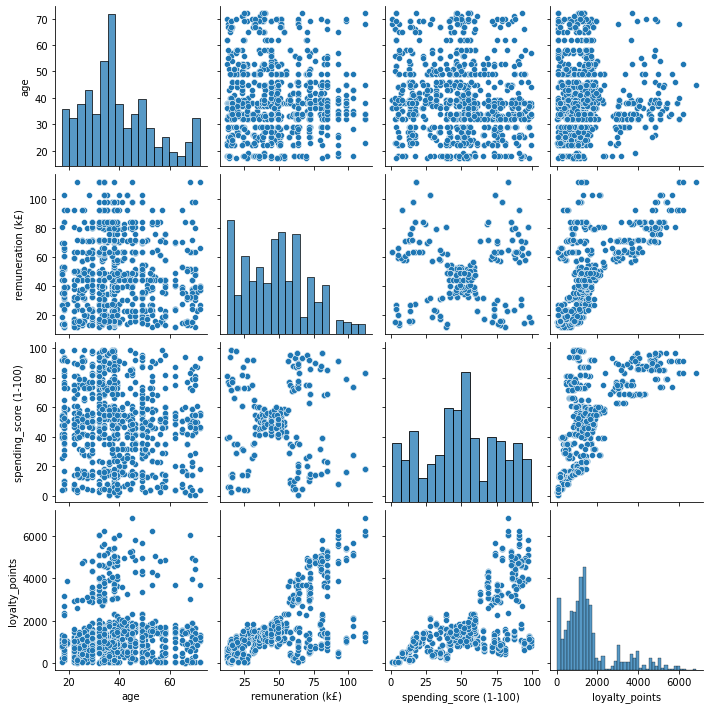

In [6]:
# Now a pairplot will show the distribution of the data as well as the relationship between the four variables
sns.pairplot(review_numbers)

### Interpretation

There are some linear relationship that can be detected for example between remuneration and loyalty points as well as spending score and loyalty points. 

Looking at the distribution of the data, there seems to be no normal distribution as the data seems to have either large tails, or skewed to either side of the mean. 


## 2. Drop columns

In [7]:
# Drop unnecessary columns.
review_data.drop(['language', 'platform'], axis = 1)

# View column names.
review_data

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


## 3. Rename columns

In [8]:
# Rename the column headers.
review_data.rename(columns = {'remuneration (k£)': 'annual salary in k', 'spending_score (1-100)' : 'spending_score'},\
                   inplace = True)

## 4. Save the DataFrame as a CSV file

In [9]:
# Create a CSV file as output.

review_data.to_csv(r'C:\Users\patri\Desktop\LSE_CareerAccelerator\Course 3\Assignment\review_data.csv', index = False,\
                   header = True)

In [10]:
# Import new CSV file with Pandas.
review_data_clean = pd.read_csv('review_data.csv')

# View DataFrame.
review_data_clean

,gender,age,annual salary in k,spending_score,loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


## 5. Linear regression

### 5a) spending vs loyalty

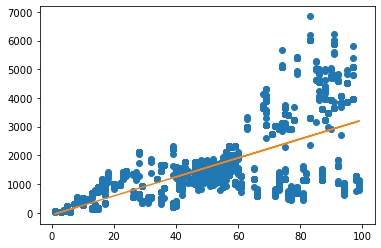

In [11]:
# Import numpy in order to reshape the data
import numpy as np

# Subset the data
spend_loyalty = review_data_clean[['loyalty_points', 'spending_score']]

# Define the independent variable y
y = np.array(spend_loyalty['loyalty_points'])

# Define the dependent variable x
x = np.array(spend_loyalty['spending_score'])

# Create a basic scatterplot
plt.plot(x, y, 'o')

# Obtain m (slope) and c (intercept) of the linear regression line
m, c = np.polyfit(x, y, 1)

# Add the linear regression line to the scatter plot.
plt.plot(x, m*x+c)

In [12]:
# There seems to be a bit of linearity but visually there is heteroscedacity, 
# which contraticts the assumption of a linear model.

# OLS model and summary.

# Create a formula
f = 'y ~ x'
test = ols(f, data = spend_loyalty).fit()

# Print the regression table
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        12:50:51   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Now we can print the important figures for our analysis

print('Parameters ', test.params)
print('Standard errors ', test.bse)
print('Predicted values ', test.predict())

Parameters  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [14]:
# Create now the linear regression equation
y_pred = 33.0617 * x + -75.0527

y_pred

array([1214.3536, 2602.945 ,  123.3175, ..., 2933.562 ,  453.9345,
        189.4409])

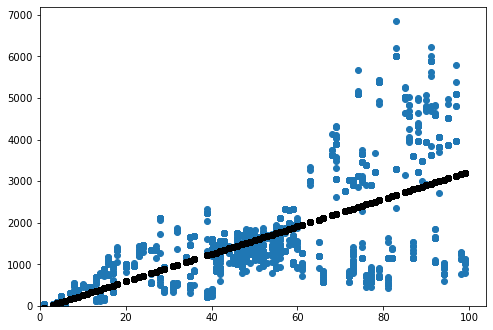

In [15]:
# Plot the graph with a regression line.
# Now plot the scatterplot using matplotlib

# Increase plot size for visibility
plt.rcParams['figure.figsize'] = (8, 5.5)

# Plot the data points 
plt.scatter(x, y)

# Plot the regression line
plt.scatter(x, y_pred, color = 'black')

# Set the x and y limites of the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

### 5b) renumeration vs loyalty

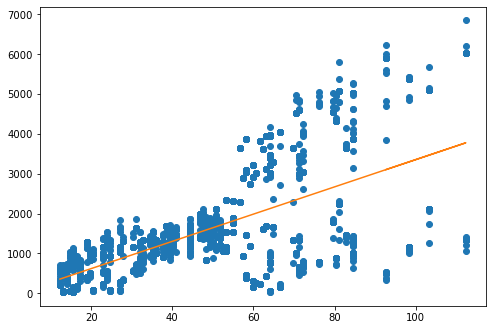

In [16]:
# Subset the data
salary_loyalty = review_data_clean[['loyalty_points', 'annual salary in k']]

# Define the independent variable y
y = np.array(salary_loyalty['loyalty_points'])

# Define the dependent variable x
x = np.array(salary_loyalty['annual salary in k'])

# Create a basic scatterplot
plt.plot(x, y, 'o')

# Obtain m (slope) and c (intercept) of the linear regression line
m, c = np.polyfit(x, y, 1)

# Add the linear regression line to the scatter plot.
plt.plot(x, m*x+c)

In [17]:
# There seems to be a bit of linearity but visually there is heteroscedacity, 
# which contraticts the assumption of a linear model.

# OLS model and summary.

# Create a formula
f = 'y ~ x'
test = ols(f, data = salary_loyalty).fit()

# Print the regression table
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        12:51:10   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Now we can print the important figures for our analysis

print('Parameters ', test.params)
print('Standard errors ', test.bse)
print('Predicted values ', test.predict())

Parameters  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [19]:
# Create now the linear regression equation
y_pred = 34.187825 * x + 65.686513

y_pred

array([ 486.1967605,  486.1967605,  514.230777 , ..., 3233.5303775,
       3429.768493 , 3233.5303775])

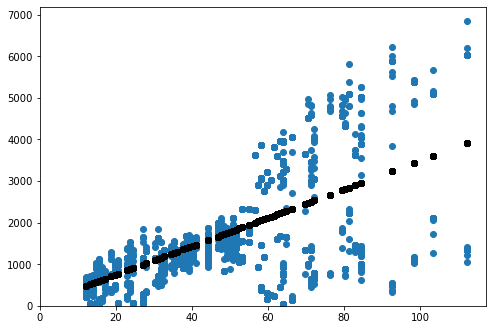

In [20]:
# Plot the graph with a regression line.
# Now plot the scatterplot using matplotlib

# Increase plot size for visibility
plt.rcParams['figure.figsize'] = (8, 5.5)

# Plot the data points 
plt.scatter(x, y)

# Plot the regression line
plt.scatter(x, y_pred, color = 'black')

# Set the x and y limites of the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

### 5c) age vs loyalty

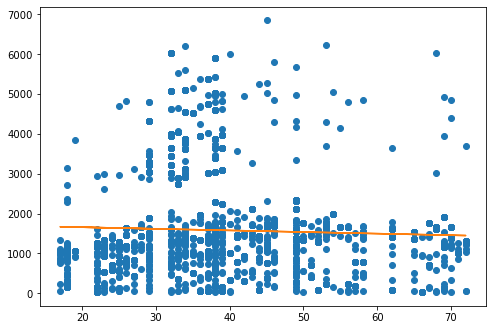

In [21]:
# Subset the data
age_loyalty = review_data_clean[['loyalty_points', 'age']]

# Define the independent variable y
y = np.array(age_loyalty['loyalty_points'])

# Define the dependent variable x
x = np.array(age_loyalty['age'])

# Create a basic scatterplot
plt.plot(x, y, 'o')

# Obtain m (slope) and c (intercept) of the linear regression line
m, c = np.polyfit(x, y, 1)

# Add the linear regression line to the scatter plot.
plt.plot(x, m*x+c)

In [22]:
# There seems to be a bit of linearity but visually there is heteroscedacity, 
# which contraticts the assumption of a linear model.

# OLS model and summary.

# Create a formula
f = 'y ~ x'
test = ols(f, data = age_loyalty).fit()

# Print the regression table
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 12 Sep 2022   Prob (F-statistic):             0.0577
Time:                        12:51:19   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Now we can print the important figures for our analysis

print('Parameters ', test.params)
print('Standard errors ', test.bse)
print('Predicted values ', test.predict())

Parameters  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [24]:
# Create now the linear regression equation
y_pred = -4.012805 * x + 1736.517739

y_pred

array([1664.287249, 1644.223224, 1648.236029, ..., 1600.082369,
       1600.082369, 1608.107979])

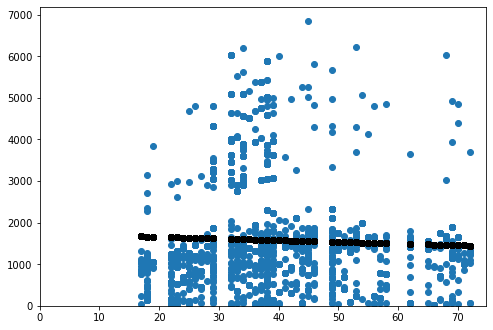

In [25]:
# Plot the graph with a regression line.
# Now plot the scatterplot using matplotlib

# Increase plot size for visibility
plt.rcParams['figure.figsize'] = (8, 5.5)

# Plot the data points 
plt.scatter(x, y)

# Plot the regression line
plt.scatter(x, y_pred, color = 'black')

# Set the x and y limites of the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

## 6. Observations and insights

The data is not normally distributed for all the numeric values that are in this dataset. 
Therefore it will be challenging to evaluate statistical tests based on the data presented. 

After performing the basic data analysis and regression analysis on the three variables 
* Age
* Annual Salary
* Spending

The spending seems to have the highest correlation to the loyalty points, so people who spend more are more likely to accumulate loyalty points. The data is quite highly correlated so we can assume that there is a positive correlation between the spending behavior and the acquisition of loyalty points. 

Age does not seem to have any correlation and even the p-value is very close to the 0.05 value and therefore we are close to not being able to reject the H0 that there is no relationship between the age and the loyalty points. 

Annual salary is also correlated to the data but the variation between the sample is very large and only 30% of the differences can be explained using the annual salary. The rest is due to other factors that are not taken into account within that specific model.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [26]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [27]:
# Determine a new DataFrame containing the salary data and the spending score
df2 = review_data_clean[['annual salary in k', 'spending_score']]

df2

,annual salary in k,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [28]:
# Create descriptive statistics and check for null values
print(df2.describe())

print(df2.isnull().sum())

df2.info()

       annual salary in k  spending_score
count         2000.000000     2000.000000
mean            48.079060       50.000000
std             23.123984       26.094702
min             12.300000        1.000000
25%             30.340000       32.000000
50%             47.150000       50.000000
75%             63.960000       73.000000
max            112.340000       99.000000
annual salary in k    0
spending_score        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   annual salary in k  2000 non-null   float64
 1   spending_score      2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


## 2. Plot

Check if there are any visible clusters, correlations and outliers.

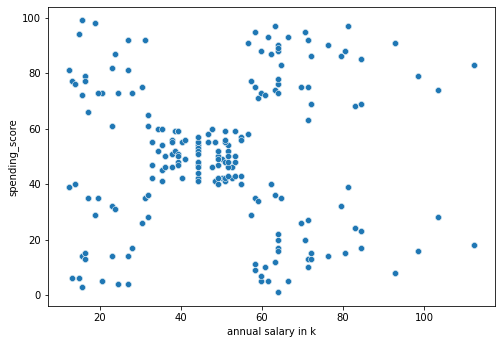

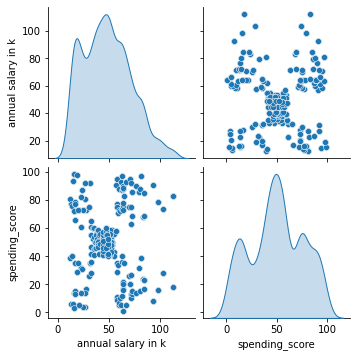

In [29]:
# Import Seaborn and Matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn
sns.scatterplot(x = 'annual salary in k', y = 'spending_score',
                data = df2)

sns.pairplot(df2, diag_kind = 'kde')

### Observations

Visually there seems to be five clusters when comparing spending score and salaries. Two on the left and right extremes and one in the center. 

The distribution of the variables does not follow a typical normal distribution. 

## 3. Elbow and silhoutte methods

<function matplotlib.pyplot.show(close=None, block=None)>

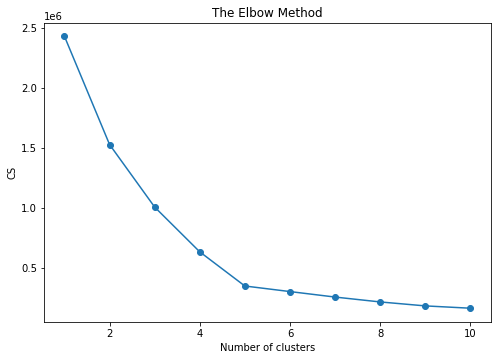

In [30]:
# Determine the number of clusters: Elbow method.

# Import KMeans classs
from sklearn.cluster import KMeans

# Create an empty list to store the cluster size
cs = []

# Create the Elbow chart to decide on the optimal number of clusters
for i in range(1, 11):
    # Set the number of clusters to the current iteration in the loop and use the improved k-means++ algorithm for this
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    # Apply the fit method with the dataframe
    kmeans.fit(df2)
    # Add the value of kmeans object to the cs list and use the append function
    cs.append(kmeans.inertia_)
    
# Plot the chart
plt.plot(range(1,11), cs, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')

plt.show

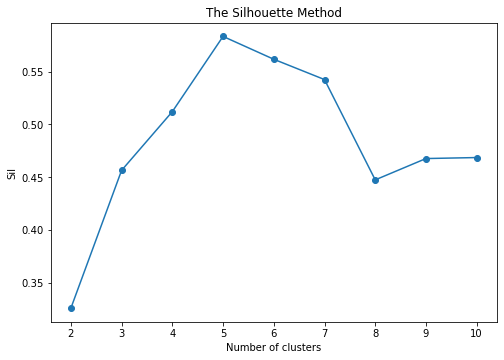

In [31]:
# Determine the number of clusters: Silhouette method.

# Import the silhouette_score class
from sklearn.metrics import silhouette_score

# Create an empty list to store the different cluster sizes
sil = []

# Set kmax = 10 to limit the maximum number of clusters to be plotted on the graph
kmax = 10

# Employ a for loop with a range from 1 to 10 to test the cluster sizes with each number of clusters
for k in range(2, kmax +1):
    # Create an object based on the KMeans() class and specify the parameters
    kmeans_s = KMeans(n_clusters = k).fit(df2)
    # Add labels and define them as kmeans_s.labels_
    labels = kmeans_s.labels_
    # Add the silhouette score of the current kmeans object to the empty sil list with the append() function
    # Specif the model (x) labels and set metrics euclidean
    sil.append(silhouette_score(df2, labels, metric = 'euclidean'))
    
# Plot the silhouette
plt.plot(range(2, kmax + 1), sil, marker = 'o')

plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')

plt.show()

## 4. Evaluate k-means model at different values of *k*

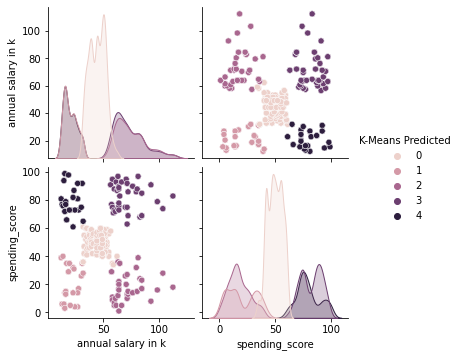

In [32]:
 # We will use a cluster size of 5 to seee how it performs
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init = 'k-means++', random_state = 0).fit(df2)
    
# Set the clusters = kmeans.labels_ the labels will be used to identify the clusters
clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted
sns.pairplot(df2, hue = 'K-Means Predicted', diag_kind = 'kde')

In [33]:
# Check the cluster sizes
df2['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

### Interpretation

As per the Elbow method and the Silhouette Method's output the cluster size of 5 seems to perform quite good

We can compare the output with a cluster size of 8 since this is where the silhouette method has another peak and the elbow method also shows a certain inflection point

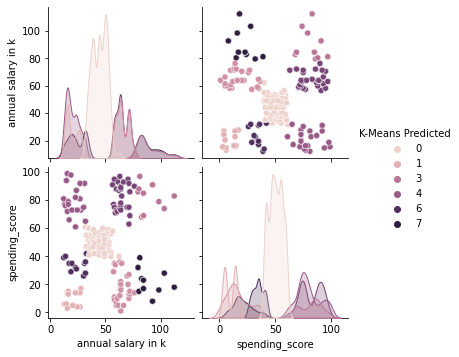

In [34]:
 # We will use a cluster size of 8 to seee how it performs
kmeans = KMeans(n_clusters = 8, max_iter = 15000, init = 'k-means++', random_state = 0).fit(df2)
    
# Set the clusters = kmeans.labels_ the labels will be used to identify the clusters
clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted
sns.pairplot(df2, hue = 'K-Means Predicted', diag_kind = 'kde')

In [35]:
df2['K-Means Predicted'].value_counts()

0    731
4    269
5    238
2    221
1    154
6    146
7    123
3    118
Name: K-Means Predicted, dtype: int64

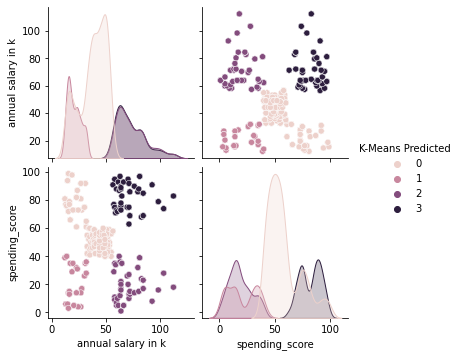

In [36]:
 # We will use a cluster size of 3 to seee how it performs
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init = 'k-means++', random_state = 0).fit(df2)
    
# Set the clusters = kmeans.labels_ the labels will be used to identify the clusters
clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted
sns.pairplot(df2, hue = 'K-Means Predicted', diag_kind = 'kde')

In [37]:
df2['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

### Interpretation

We have a large cluster '0' and the clusters are not evenly distributed. Therefore we can confirm that the best fit is the cluster size of k = 5

## 6. Plot and interpret the clusters

<AxesSubplot:xlabel='annual salary in k', ylabel='spending_score'>

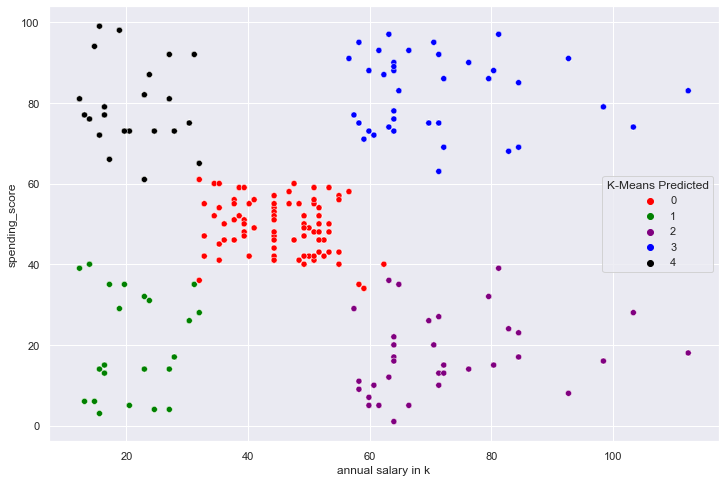

In [38]:
# Fit the model to a cluster size of 5
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init = 'k-means++', random_state = 0).fit(df2)

# Set the clusters = kmeans.labels_ the labels will be used to identify the clusters
clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Visualising the clusters.
sns.set(rc = {'figure.figsize': (12, 8)})

sns.scatterplot(x = 'annual salary in k', y = 'spending_score', data = df2, hue = 'K-Means Predicted',
                palette = ['red', 'green', 'purple', 'blue', 'black'])

In [39]:
# View the dataFrame

print(df2['K-Means Predicted'].value_counts())

df2[df2['K-Means Predicted'] == 0].describe()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64


,annual salary in k,spending_score,K-Means Predicted
count,774.000000,774.000000,774.0
mean,44.418786,49.529716,0.0
std,7.088279,6.484414,0.0
min,31.980000,34.000000,0.0
25%,38.540000,44.000000,0.0
50%,44.280000,50.000000,0.0
75%,50.020000,55.000000,0.0
max,62.320000,61.000000,0.0


## 7. Discuss: Insights and observations


Five clusters appear to be the best fit when applying both the elbow and the silhouette method. It also produces the most evenly distributed counts within the clusters. 

The central cluster has always produced the largest group, which is always anywhere between 2-4 times larger than the next biggest cluster. This suggests that a big proportion of our observations are in the middle of the spending score and annual income. This observation hints that the biggest group lies within the middle class who spend moderatly on the online shop. 
They have a spending score between 34 and 61 and an annual salary of 31.000 to 62.000 a year. 

The cluster 4 to the top left is the smallest cluster, consisting of people with a lower annual salary but a high spending score which also makes sense logically since not too many people would spend a lot on toys if the annual income is rather low.

For marketing activities I would recommend to continue the strategy for clusters 0 and 3, the central and the top right cluster as this is a very profitable one and one with a critical mass. 

Where I would recommend to change the marketing approach is the bottom left cluster 2, as these are people with high income but a low spending score. This cluster can potentially be a very profitable one. But it has to be kept in mind that this cluster has a wide spread (spending score between 0 and 40 and a salary above 55k to 115k a year. 


# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [40]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [41]:
# Determine a new DataFrame containing the salary data and the spending score
df3 = review_data_clean[['review', 'summary']]

df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [42]:
# Explore data set.
print(df3.info())

print(df3.describe())

print(df3.shape)

df3.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
         review     summary
count      2000        2000
unique     1980        1432
top     love it  Five Stars
freq          5         378
(2000, 2)


review     0
summary    0
dtype: int64

There are 2000 rows with no missing values. We can now perform the NLP processes

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [43]:
# Transform data to lowercase. We will use the lambda function to convert each word in the comments column to lowercase. 
# The function extracts each word with the split and then performs the lower function on the word. 
# It then uses the join method to add the transformed word back into the original column.

df3['review'] = df3['review'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

df3['review']

0       when it comes to a dm's screen, the space on t...
1       an open letter to galeforce9*: your unpainted ...
2       nice art, nice printing. why two panels are fi...
3       amazing buy! bought it as a gift for our new d...
4       as my review of gf9's previous screens these w...
                              ...                        
1995    the perfect word game for mixed ages (with mom...
1996    great game. did not think i would like it when...
1997    great game for all......... keeps the mind nim...
1998                                            fun game!
1999    this game is fun. a lot like scrabble without ...
Name: review, Length: 2000, dtype: object

In [44]:
# We will perform the same with the summary column

df3['summary'] = df3['summary'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

df3['summary']

0       the fact that 50% of this space is wasted on a...
1       another worthless dungeon master's screen from...
2                         pretty, but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995       the perfect word game for mixed ages (with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: summary, Length: 2000, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [45]:
# As a next step we will remove the punctuations in the review column

# Remove the punctuation
df3['review'] = df3['review'].str.replace('[^\w\s]','')
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [46]:
# Perform the same on the summary column
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary']

0       the fact that 50 of this space is wasted on ar...
1       another worthless dungeon masters screen from ...
2                          pretty but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995        the perfect word game for mixed ages with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: summary, Length: 2000, dtype: object

### 2c) Drop duplicates in both columns

In [47]:
# Subset the column so we can perform the remove duplicates on both columns separately
df3_review = df3['review'].drop_duplicates().to_frame()
df3_review.reset_index(inplace = True)

df3_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   1950 non-null   int64 
 1   review  1950 non-null   object
dtypes: int64(1), object(1)
memory usage: 30.6+ KB


In [48]:
# Perform the remove duplicate step in the summary as well.
print(df3['summary'].duplicated().sum())
print(df3['summary'].info())
# Remove duplicates
df3_summary = df3['summary'].drop_duplicates().to_frame()
df3_summary.reset_index(inplace = True)

# Check the new dataframe
print(df3_summary.info())

df3_summary

649
<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: summary
Non-Null Count  Dtype 
--------------  ----- 
2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    1351 non-null   int64 
 1   summary  1351 non-null   object
dtypes: int64(1), object(1)
memory usage: 21.2+ KB
None


,index,summary
0,0,the fact that 50 of this space is wasted on ar...
1,1,another worthless dungeon masters screen from ...
2,2,pretty but also pretty useless
3,3,five stars
4,4,money trap
...,...,...
1346,1989,this is a fun card game for people who like words
1347,1990,sort of a card game equivalent of scrabble and...
1348,1992,great game to keep the mind active
1349,1994,a great mind game


## 3. Tokenise and create wordclouds

After subsetting both the review and summary columns we can now tokenize the words in each subset

In [49]:
# Apply tokenization
df3_summary['tokenize'] = df3_summary['summary'].apply(word_tokenize)

df3_summary

,index,summary,tokenize
0,0,the fact that 50 of this space is wasted on ar...,"[the, fact, that, 50, of, this, space, is, was..."
1,1,another worthless dungeon masters screen from ...,"[another, worthless, dungeon, masters, screen,..."
2,2,pretty but also pretty useless,"[pretty, but, also, pretty, useless]"
3,3,five stars,"[five, stars]"
4,4,money trap,"[money, trap]"
...,...,...,...
1346,1989,this is a fun card game for people who like words,"[this, is, a, fun, card, game, for, people, wh..."
1347,1990,sort of a card game equivalent of scrabble and...,"[sort, of, a, card, game, equivalent, of, scra..."
1348,1992,great game to keep the mind active,"[great, game, to, keep, the, mind, active]"
1349,1994,a great mind game,"[a, great, mind, game]"


In [50]:
df3_review['tokenize'] = df3_review['review'].apply(word_tokenize)

df3_review

,index,review,tokenize
0,0,when it comes to a dms screen the space on the...,"[when, it, comes, to, a, dms, screen, the, spa..."
1,1,an open letter to galeforce9 your unpainted mi...,"[an, open, letter, to, galeforce9, your, unpai..."
2,2,nice art nice printing why two panels are fill...,"[nice, art, nice, printing, why, two, panels, ..."
3,3,amazing buy bought it as a gift for our new dm...,"[amazing, buy, bought, it, as, a, gift, for, o..."
4,4,as my review of gf9s previous screens these we...,"[as, my, review, of, gf9s, previous, screens, ..."
...,...,...,...
1945,1994,we are retired and find this a great way to st...,"[we, are, retired, and, find, this, a, great, ..."
1946,1995,the perfect word game for mixed ages with mom ...,"[the, perfect, word, game, for, mixed, ages, w..."
1947,1996,great game did not think i would like it when ...,"[great, game, did, not, think, i, would, like,..."
1948,1997,great game for all keeps the mind nimble,"[great, game, for, all, keeps, the, mind, nimble]"


In [51]:
# We will now visualize the frequency of the words by creating a word cloud.
# Create an empty list which we will use to pass through the tokenized review.
all_reviews_token = []

for i in range(df3_review.shape[0]):
    all_reviews_token = all_reviews_token + df3_review['tokenize'][i]
    
all_reviews_token[0:5]

['when', 'it', 'comes', 'to', 'a']

In [52]:
# Now add the tokenized words into a string
reviews_token_string = ''
for value in all_reviews_token:
    reviews_token_string = reviews_token_string + value + ' '

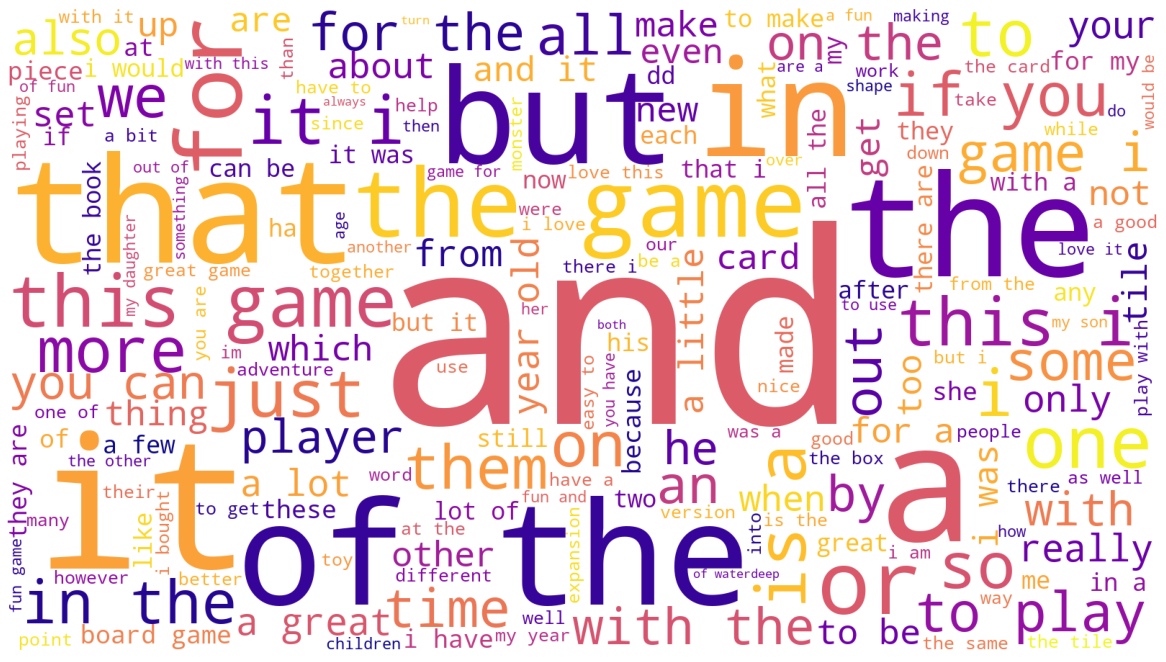

In [53]:
# Create a word cloud. Set the color palette first
sns.set(color_codes = True)
# Create a WordCloud object
word_cloud = WordCloud(width = 1600, height = 900,
                      background_color = 'white',
                      colormap = 'plasma',
                      stopwords = 'none',
                      min_font_size = 10).generate(reviews_token_string)

# Plot the WordCloud Image
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad= 0)
plt.show()

In [54]:
# Repeat the same with the summary data
# Create an empty list which we will use to pass through the tokenized review.
all_summaries_token = []

for i in range(df3_summary.shape[0]):
    all_summaries_token = all_summaries_token + df3_summary['tokenize'][i]
    
all_summaries_token[0:5]

['the', 'fact', 'that', '50', 'of']

In [55]:
# Now add the tokenized words into a string
summaries_token_string = ''
for value in all_summaries_token:
    summaries_token_string = summaries_token_string + value + ' '
    
summaries_token_string

'the fact that 50 of this space is wasted on art and not terribly informative or needed art another worthless dungeon masters screen from galeforce9 pretty but also pretty useless five stars money trap best gm screen ever great but could be even better another missed opportunity not a value add to the product line love the map not a general dm screen very weak game fell completely flat good book buckley was a card mommer very advanced but as good as it gets you better know what youre getting into dont bother the worst value ive ever seen not enough product good product but temporary tattoos were good gift huge hit gorgeous pictures wonderful designs wow great coloring book nice book great pictures perfect well done my relaxation beautiful coloring book the pictures are great ive done one and gave it to a great buy cant wait to work on this book stained glass perfection four stars so beautiful very nice three stars i like every image contained in this stained glass coloring book creativ

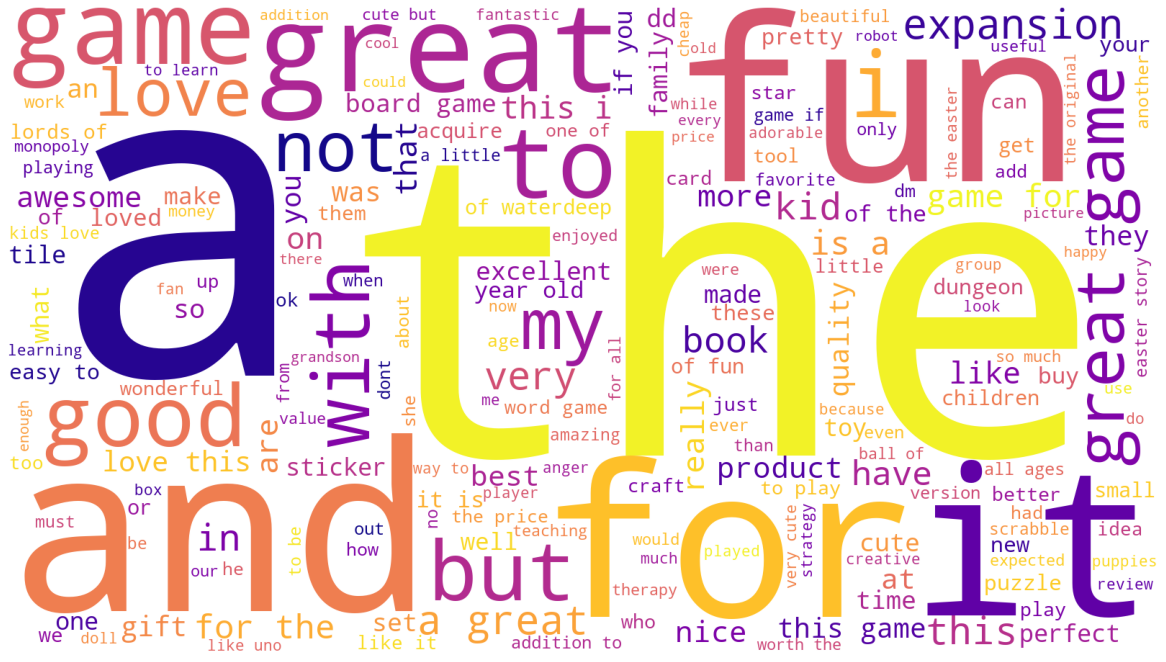

In [56]:
# Create a word cloud. Set the color palette first
sns.set(color_codes = True)
# Create a WordCloud object
word_cloud = WordCloud(width = 1600, height = 900,
                      background_color = 'white',
                      colormap = 'plasma',
                      stopwords = 'none',
                      min_font_size = 10).generate(summaries_token_string)

# Plot the WordCloud Image
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad= 0)
plt.show()

## Interpretation

The stop words are very dominant in ths word cloud. To derive any significant insights, we should remove them.

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [57]:
fdist_summaries = FreqDist(all_summaries_token)
fdist_summaries

FreqDist({'game': 268, 'the': 258, 'a': 238, 'great': 237, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

In [58]:
fdist_review = FreqDist(all_reviews_token)
fdist_review

FreqDist({'the': 5449, 'and': 3233, 'to': 3162, 'a': 3159, 'of': 2487, 'i': 2089, 'it': 2082, 'is': 1781, 'this': 1774, 'game': 1668, ...})

### 4b) Remove alphanumeric characters and stopwords

In [59]:
# We will remove the alphanumeric values from the tokenized dataframe. 
all_summaries_token = [word for word in all_summaries_token if word.isalnum()]

all_reviews_token = [word for word in all_reviews_token if word.isalnum()]

In [60]:
# Since the stopwords dominate the wordcloud it makes sense to remove them because the relevant words will be downplayed. 
from nltk.corpus import stopwords

# Create a set of English stopwords
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
summaries_token2 = [x for x in all_summaries_token if x.lower() not in english_stopwords]

# Create an empty string variable to store the strings in to create a wordcloud
summaries_token2_string = ''
for value in summaries_token2:
    summaries_token2_string = summaries_token2_string + value + ' '

# Check the first 20 characters
summaries_token2_string[0:20]

'fact 50 space wasted'

In [61]:
# Perform the same on the reviews
reviews_token2 = [x for x in all_reviews_token if x.lower() not in english_stopwords]

# Create an empty string variable to store the strings in to create a wordcloud
reviews_token2_string = ''
for value in reviews_token2:
    reviews_token2_string = reviews_token2_string + value + ' '

# Check the first 20 characters
reviews_token2_string[0:20]

'comes dms screen spa'

### 4c) Create wordcloud without stopwords

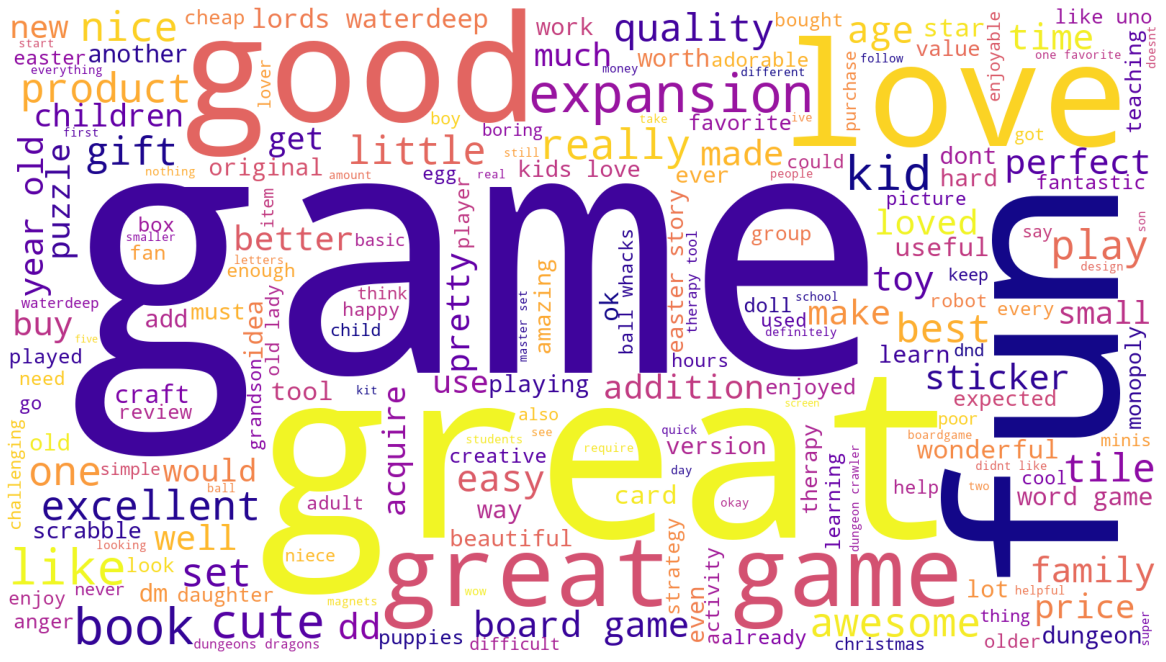

In [62]:
# Create a wordcloud for summaries
sns.set(color_codes = True)
# Create a WordCloud object
word_cloud = WordCloud(width = 1600, height = 900,
                      background_color = 'white',
                      colormap = 'plasma',
                      stopwords = 'none',
                      min_font_size = 10).generate(summaries_token2_string)

# Plot the WordCloud image
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

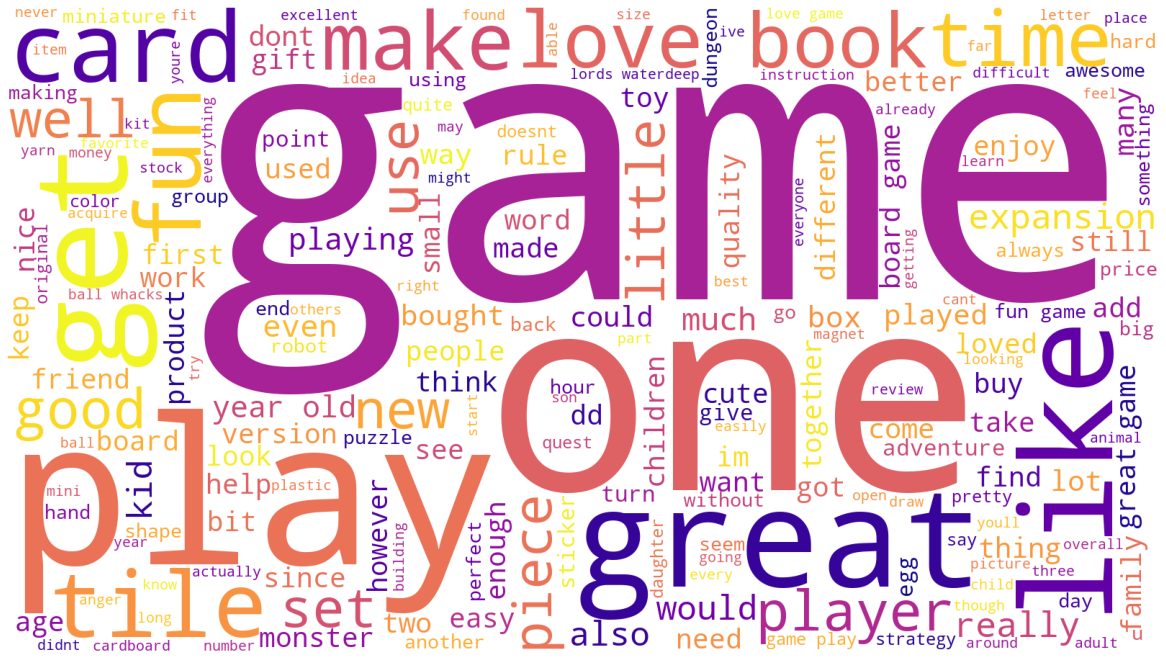

In [63]:
# Create a wordcloud for reviews
sns.set(color_codes = True)
# Create a WordCloud object
word_cloud = WordCloud(width = 1600, height = 900,
                      background_color = 'white',
                      colormap = 'plasma',
                      stopwords = 'none',
                      min_font_size = 10).generate(reviews_token2_string)

# Plot the WordCloud image
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

### 4d) Identify 15 most common words and polarity

           Frequency
Word                
game             268
great            237
fun              175
good              84
love              70
like              54
kids              48
book              42
expansion         42
cute              40
old               34
really            30
set               30
nice              28
one               28


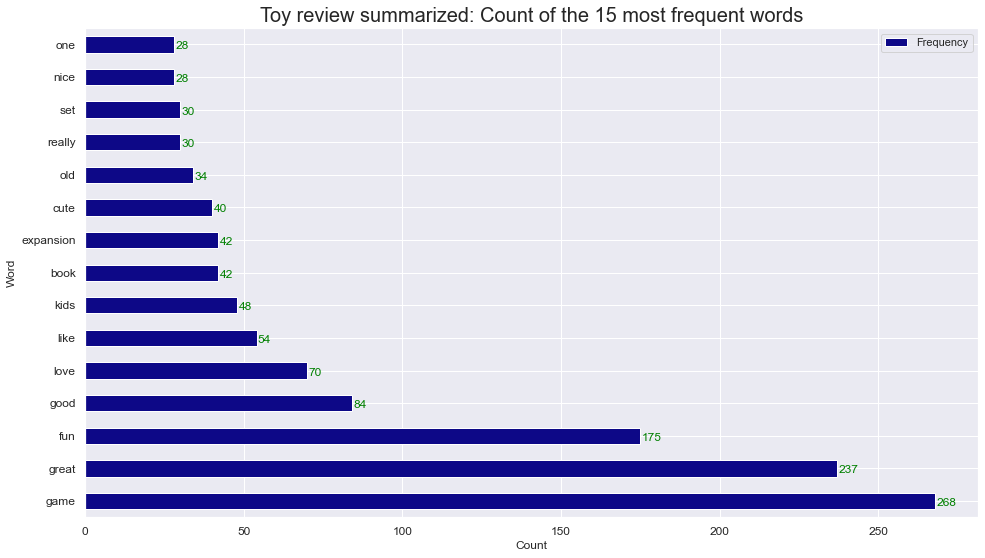

In [64]:
# Let's now investigate the frequency on the tokenized words without the stopwords
from collections import Counter
# Generate a DF from counter. We will start with the summaries
counts_sum = pd.DataFrame(Counter(summaries_token2).most_common(15),
                     columns = ['Word', 'Frequency']).set_index('Word')

# Display the result
print(counts_sum)

# We will also plot the results in bargraph to maximuze the impact of the visualizations
ax = counts_sum.plot(kind = 'barh', figsize = (16, 9), fontsize = 12, colormap = 'plasma')
ax.set_xlabel('Count', fontsize = 12)
ax.set_ylabel('Word', fontsize = 12)
ax.set_title('Toy review summarized: Count of the 15 most frequent words', fontsize = 20)

# Draw the bar labels and apply them into the plot
for i in ax.patches:
    ax.text(i.get_width() + 0.41, i.get_y() + 0.1, str(round((i.get_width()), 2)), fontsize = 12, color = 'green')

        Frequency
Word             
game         1668
great         579
fun           549
one           530
play          502
like          414
love          322
really        319
get           319
cards         301
tiles         297
time          291
good          287
would         280
book          273


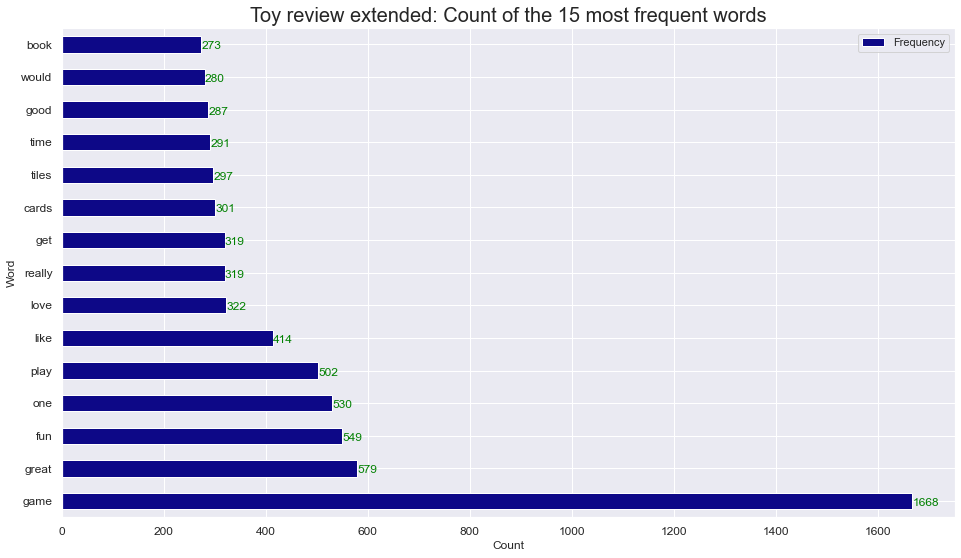

In [65]:
# Now perform the same on the reviews
counts_rev = pd.DataFrame(Counter(reviews_token2).most_common(15),
                     columns = ['Word', 'Frequency']).set_index('Word')

# Display the result
print(counts_rev)

# We will also plot the results in bargraph to maximuze the impact of the visualizations
ax = counts_rev.plot(kind = 'barh', figsize = (16, 9), fontsize = 12, colormap = 'plasma')
ax.set_xlabel('Count', fontsize = 12)
ax.set_ylabel('Word', fontsize = 12)
ax.set_title('Toy review extended: Count of the 15 most frequent words', fontsize = 20)

# Draw the bar labels and apply them into the plot
for i in ax.patches:
    ax.text(i.get_width() + 0.41, i.get_y() + 0.1, str(round((i.get_width()), 2)), fontsize = 12, color = 'green')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [66]:
# At this stage we want to extract the sentiment polarity for the summary and reviews

def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Populate a new volumn with polarity scores for each summary
df3_summary['Polarity'] = df3_summary['summary'].apply(generate_polarity)

# Preview the result
df3_summary['Polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: Polarity, dtype: float64

In [67]:
# We will also perform the same for the sentiment scores
def generate_subjectivity(x):
    return TextBlob(x).sentiment[1]

# Create a new column with subjectivity scores
df3_summary['Subjectivity'] = df3_summary['summary'].apply(generate_subjectivity)

df3_summary['Subjectivity'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: Subjectivity, dtype: float64

In [68]:
# Populate a new volumn with polarity scores for each review
df3_review['Polarity'] = df3_review['review'].apply(generate_polarity)

# Preview the result
df3_review['Polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: Polarity, dtype: float64

In [69]:
df3_review['Subjectivity'] = df3_review['review'].apply(generate_subjectivity)

df3_review['Subjectivity'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: Subjectivity, dtype: float64

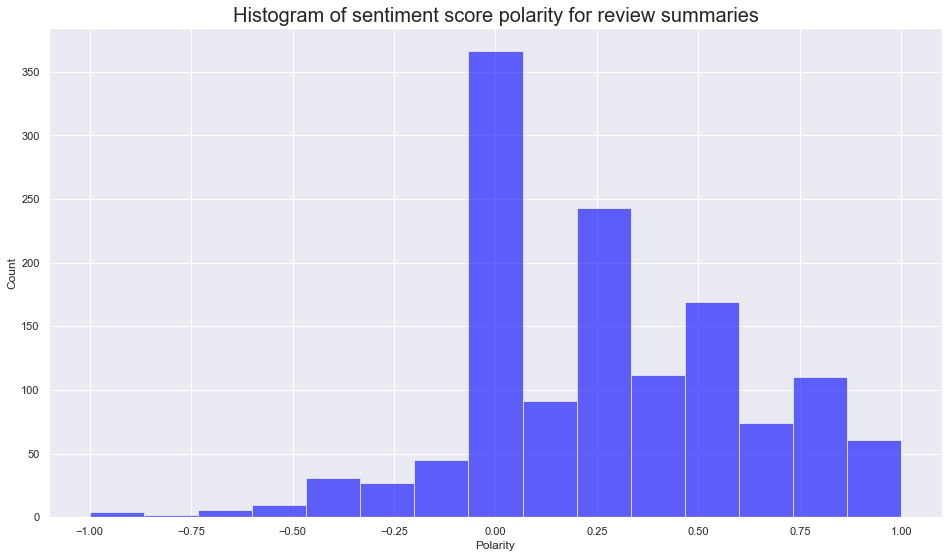

In [71]:
# Create a Histogram for the summaries' sentiment polarity
# Set the number of bins = 15
num_bins = 15

# Set the plot area
plt.figure(figsize = (16, 9))

# Define the bars
n, bins, patches = plt.hist(df3_summary['Polarity'], num_bins, facecolor= 'blue', alpha = 0.6)

# Set the labels
plt.xlabel('Polarity', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Histogram of sentiment score polarity for review summaries', fontsize = 20)

plt.show()

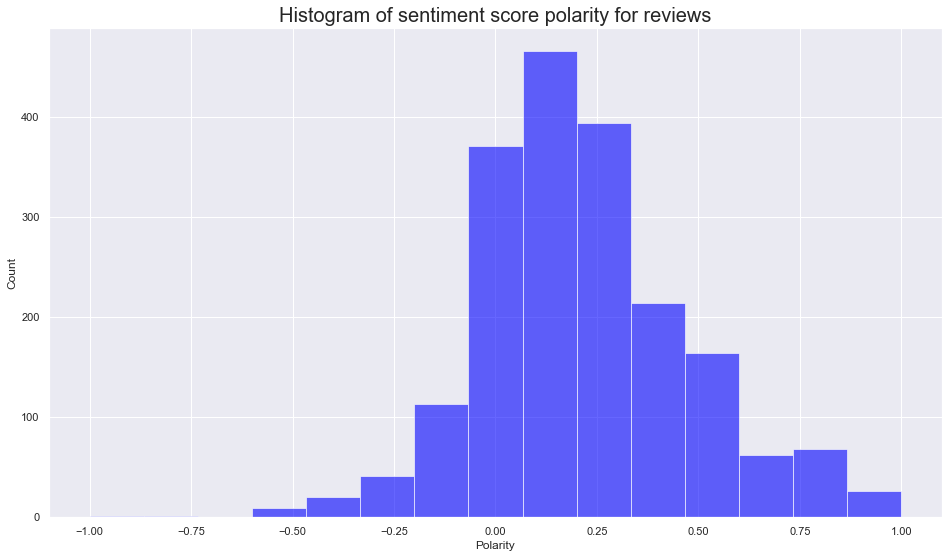

In [70]:
# Create a Histogram for the reviews sentiment polarity
# Set the number of bins = 15
num_bins = 15

# Set the plot area
plt.figure(figsize = (16, 9))

# Define the bars
n, bins, patches = plt.hist(df3_review['Polarity'], num_bins, facecolor= 'blue', alpha = 0.6)

# Set the labels
plt.xlabel('Polarity', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Histogram of sentiment score polarity for reviews', fontsize = 20)

plt.show()


## 6. Identify top 20 positive and negative reviews and summaries respectively

We will now extract the comments assigned the highest and lowest polarity scores to get specific examples of what consitutes of the strong opinions in our data.

In [72]:
positive_sentiment_sum = df3_summary.nlargest(20, 'Polarity')

# Adjust the column width
positive_sentiment_sum.style.set_properties(subject = ['summary'], **{'width': '1200px'})

,index,summary,tokenize,Polarity,Subjectivity
5,6,best gm screen ever,"['best', 'gm', 'screen', 'ever']",1.000000,0.300000
23,28,wonderful designs,"['wonderful', 'designs']",1.000000,1.000000
27,32,perfect,['perfect'],1.000000,1.000000
61,80,theyre the perfect size to keep in the car or a diaper,"['theyre', 'the', 'perfect', 'size', 'to', 'keep', 'in', 'the', 'car', 'or', 'a', 'diaper']",1.000000,1.000000
107,134,perfect for preschooler,"['perfect', 'for', 'preschooler']",1.000000,1.000000
112,140,awesome sticker activity for the price,"['awesome', 'sticker', 'activity', 'for', 'the', 'price']",1.000000,1.000000
132,161,awesome book,"['awesome', 'book']",1.000000,1.000000
133,163,he was very happy with his gift,"['he', 'was', 'very', 'happy', 'with', 'his', 'gift']",1.000000,1.000000
150,187,awesome,['awesome'],1.000000,1.000000
166,210,awesome and welldesigned for 9 year olds,"['awesome', 'and', 'welldesigned', 'for', '9', 'year', 'olds']",1.000000,1.000000


In [73]:
negative_sentiment_sum = df3_summary.nsmallest(20, 'Polarity')

# Adjust the column width
negative_sentiment_sum.style.set_properties(subject = ['summary'], **{'width': '1200px'})

,index,summary,tokenize,Polarity,Subjectivity
17,21,the worst value ive ever seen,"['the', 'worst', 'value', 'ive', 'ever', 'seen']",-1.000000,1.000000
165,208,boring unless you are a craft person which i am,"['boring', 'unless', 'you', 'are', 'a', 'craft', 'person', 'which', 'i', 'am']",-1.000000,1.000000
588,829,boring,['boring'],-1.000000,1.000000
838,1166,before this i hated running any rpg campaign dealing with towns because it,"['before', 'this', 'i', 'hated', 'running', 'any', 'rpg', 'campaign', 'dealing', 'with', 'towns', 'because', 'it']",-0.900000,0.700000
1,1,another worthless dungeon masters screen from galeforce9,"['another', 'worthless', 'dungeon', 'masters', 'screen', 'from', 'galeforce9']",-0.800000,0.900000
116,144,disappointed,['disappointed'],-0.750000,0.750000
266,363,promotes anger instead of teaching calming methods,"['promotes', 'anger', 'instead', 'of', 'teaching', 'calming', 'methods']",-0.700000,0.200000
635,885,too bad this is not what i was expecting,"['too', 'bad', 'this', 'is', 'not', 'what', 'i', 'was', 'expecting']",-0.700000,0.666667
638,890,bad qualityall made of paper,"['bad', 'qualityall', 'made', 'of', 'paper']",-0.700000,0.666667
144,178,at age 31 i found these very difficult to make,"['at', 'age', '31', 'i', 'found', 'these', 'very', 'difficult', 'to', 'make']",-0.650000,1.000000


In [74]:
positive_sentiment_rev = df3_review.nlargest(20, 'Polarity')

# Adjust the column width
positive_sentiment_rev.style.set_properties(subject = ['summary'], **{'width': '1200px'})

,index,review,tokenize,Polarity,Subjectivity
7,7,came in perfect condition,"['came', 'in', 'perfect', 'condition']",1.000000,1.000000
164,165,awesome book,"['awesome', 'book']",1.000000,1.000000
193,194,awesome gift,"['awesome', 'gift']",1.000000,1.000000
489,496,excellent activity for teaching selfmanagement skills,"['excellent', 'activity', 'for', 'teaching', 'selfmanagement', 'skills']",1.000000,1.000000
517,524,perfect just what i ordered,"['perfect', 'just', 'what', 'i', 'ordered']",1.000000,1.000000
583,591,wonderful product,"['wonderful', 'product']",1.000000,1.000000
601,609,delightful product,"['delightful', 'product']",1.000000,1.000000
613,621,wonderful for my grandson to learn the resurrection story,"['wonderful', 'for', 'my', 'grandson', 'to', 'learn', 'the', 'resurrection', 'story']",1.000000,1.000000
782,790,perfect,['perfect'],1.000000,1.000000
922,933,awesome,['awesome'],1.000000,1.000000


In [75]:
negative_sentiment_rev = df3_review.nsmallest(20, 'Polarity')

# Adjust the column width
negative_sentiment_rev.style.set_properties(subject = ['summary'], **{'width': '1200px'})

,index,review,tokenize,Polarity,Subjectivity
207,208,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,"['booo', 'unles', 'you', 'are', 'patient', 'know', 'how', 'to', 'measure', 'i', 'didnt', 'have', 'the', 'patience', 'neither', 'did', 'my', 'daughter', 'boring', 'unless', 'you', 'are', 'a', 'craft', 'person', 'which', 'i', 'am', 'not']",-1.000000,1.000000
181,182,incomplete kit very disappointing,"['incomplete', 'kit', 'very', 'disappointing']",-0.780000,0.910000
1766,1804,im sorry i just find this product to be boring and to be frank juvenile,"['im', 'sorry', 'i', 'just', 'find', 'this', 'product', 'to', 'be', 'boring', 'and', 'to', 'be', 'frank', 'juvenile']",-0.583333,0.750000
362,364,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,"['one', 'of', 'my', 'staff', 'will', 'be', 'using', 'this', 'game', 'soon', 'so', 'i', 'dont', 'know', 'how', 'well', 'it', 'works', 'as', 'yet', 'but', 'after', 'looking', 'at', 'the', 'cards', 'i', 'believe', 'it', 'will', 'be', 'helpful', 'in', 'getting', 'a', 'conversation', 'started', 'regarding', 'anger', 'and', 'what', 'to', 'do', 'to', 'control', 'it']",-0.550000,0.300000
116,117,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,"['i', 'bought', 'this', 'as', 'a', 'christmas', 'gift', 'for', 'my', 'grandson', 'its', 'a', 'sticker', 'book', 'so', 'how', 'can', 'i', 'go', 'wrong', 'with', 'this', 'gift']",-0.500000,0.900000
226,227,this was a gift for my daughter i found it difficult to use,"['this', 'was', 'a', 'gift', 'for', 'my', 'daughter', 'i', 'found', 'it', 'difficult', 'to', 'use']",-0.500000,1.000000
229,230,i found the directions difficult,"['i', 'found', 'the', 'directions', 'difficult']",-0.500000,1.000000
289,290,instructions are complicated to follow,"['instructions', 'are', 'complicated', 'to', 'follow']",-0.500000,1.000000
300,301,difficult,['difficult'],-0.500000,1.000000
1496,1524,expensive for what you get,"['expensive', 'for', 'what', 'you', 'get']",-0.500000,0.700000


## Interpretation and discussion

Sentiment scores for the reviews and summaries are quite positively skewed. This means our customers who review us are more likely to do so because they like our products. 

We can validate that the sentiment scores are predicted quite well by looking at the top and bottom reviews based on the sentiment score. The classification is not perfect, as some comments received a low score but the content is positive e.g. "this game is a blast". However, the overall picture is consistent with the scores and we can confirm that customers like our products. 

# 